# Sign Language

from IPython.display import Image
Image("../input/amer_sign2.png")

# About the data

The original MNIST image dataset of handwritten digits is a popular benchmark for image-based machine learning methods but researchers have renewed efforts to update it and develop drop-in replacements that are more challenging for computer vision and original for real-world applications. As noted in one recent replacement called the Fashion-MNIST dataset, the Zalando researchers quoted the startling claim that "Most pairs of MNIST digits (784 total pixels per sample) can be distinguished pretty well by just one pixel". To stimulate the community to develop more drop-in replacements, the Sign Language MNIST is presented here and follows the same CSV format with labels and pixel values in single rows. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

Load the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('D:/Semester_7/PCD/Tubes/input/sign_mnist_train.csv')
test = pd.read_csv('D:/Semester_7/PCD/Tubes/input/sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
train.shape

(27455, 785)

The data set is given in the form of labels and pixel value ranging from pixel 1 to pixel 784 which is 28 * 28 image.

Let's see what does each sign means

Image("D:/Semester_7/PCD/Tubes/input/american_sign_language.PNG")

Each letter indicates a sign produced by our fingers. We will apply deep learning to these images to make sure our model can understand what sign indicated what letter

In [5]:
y_train = train['label'].values
y_test = test['label'].values
print(y_test)

uniqval = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
print(uniqval)

[ 6  5 10 ...  2  4  2]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


# Data exploration

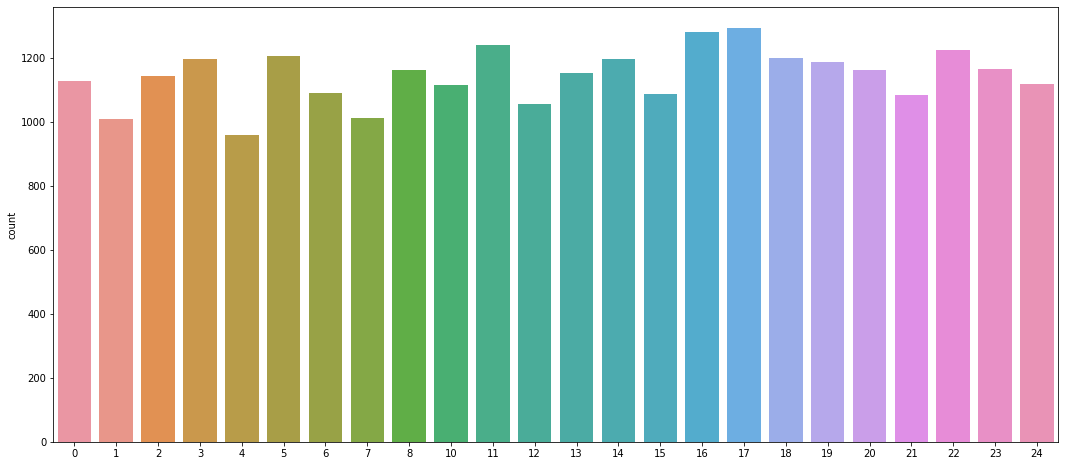

In [6]:
plt.figure(figsize = (18,8))
sns.countplot(x = y_train)

As you can see each one is almost equally distributed

In [7]:
train.drop('label', axis = 1, inplace = True)
test.drop('label', axis = 1, inplace = True)

We are droping the label coloumn from the training set

Re shaping the images

In [8]:
x_train = train.values
x_train = np.array([np.reshape(i, (28, 28)) for i in x_train])
x_train = np.array([i.flatten() for i in x_train])

x_test = test.values
x_test = np.array([np.reshape(i, (28, 28)) for i in x_test])
x_test = np.array([i.flatten() for i in x_test])

Since our target variable are in categorical(nomial) so we are using label binarizer

In [9]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
y_train = label_binrizer.fit_transform(y_train)
y_test = label_binrizer.fit_transform(y_test)

Lets see how the images look

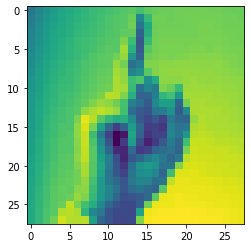

In [10]:
plt.imshow(x_train[0].reshape(28,28))

Spliting the dataset into train(70%) and test(30%)

In [11]:
from sklearn.model_selection import train_test_split

For deep learning i am using keras library

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Creating the batch size to 128 and using 50 epochs

In [13]:
batch_size = 128
num_classes = 24
epochs = 50

Normalizing the training and test data

In [14]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [15]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [16]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Visualizing the image after normalizing

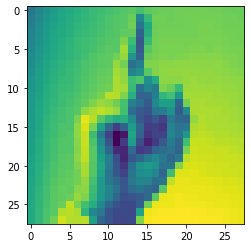

In [17]:
plt.imshow(x_train[0].reshape(28,28))

# CNN Model

In [18]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(Conv2D(8, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(16, kernel_size = (3, 3), activation = 'relu'))
model.add(Conv2D(16, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
#model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 8)         584       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 16)          0

In [20]:
import tensorflow

model.compile(loss = tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics = ['accuracy'])

In [21]:
history = model.fit(x_train, y_train,validation_data=(x_test, y_test),validation_steps = 1, epochs=epochs, batch_size=batch_size)

Train on 27455 samples, validate on 7172 samples
Epoch 1/50
27455/27455 [==============================] - 4s 144us/sample - loss: 2.9216 - accuracy: 0.1022 - val_loss: 0.0408 - val_accuracy: 0.2969
Epoch 2/50
27455/27455 [==============================] - 1s 43us/sample - loss: 2.2598 - accuracy: 0.2499 - val_loss: 0.0308 - val_accuracy: 0.4766
Epoch 3/50
27455/27455 [==============================] - 1s 49us/sample - loss: 1.8878 - accuracy: 0.3602 - val_loss: 0.0258 - val_accuracy: 0.5938
Epoch 4/50
27455/27455 [==============================] - 1s 50us/sample - loss: 1.6768 - accuracy: 0.4257 - val_loss: 0.0225 - val_accuracy: 0.5703
Epoch 5/50
27455/27455 [==============================] - 1s 48us/sample - loss: 1.5414 - accuracy: 0.4737 - val_loss: 0.0207 - val_accuracy: 0.6562
Epoch 6/50
27455/27455 [==============================] - 2s 55us/sample - loss: 1.4484 - accuracy: 0.4962 - val_loss: 0.0196 - val_accuracy: 0.6562
Epoch 7/50
27455/27455 [==============================] 

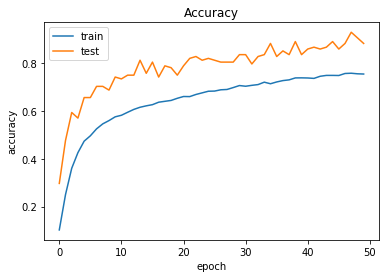

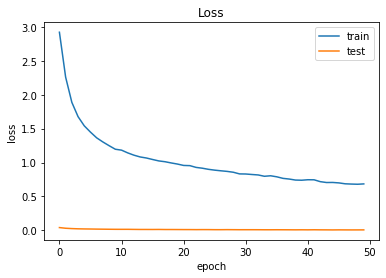

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])

plt.show()

As you can see, the number of epochs increase the accuracy also increases.

Let's validate with the test data

test_labels = test['label']

test.drop('label', axis = 1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images = test_images.astype('float32')

test_images.shape

Predecting with test images

In [23]:
y_pred = model.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy_score(y_test, y_pred.round())

0.7997769102063581

In [26]:
#Helper function to plot confusion matrix
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (24, 24))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(uniqval))
    plt.xticks(tick_marks, uniqval, rotation=45)
    plt.yticks(tick_marks, uniqval)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

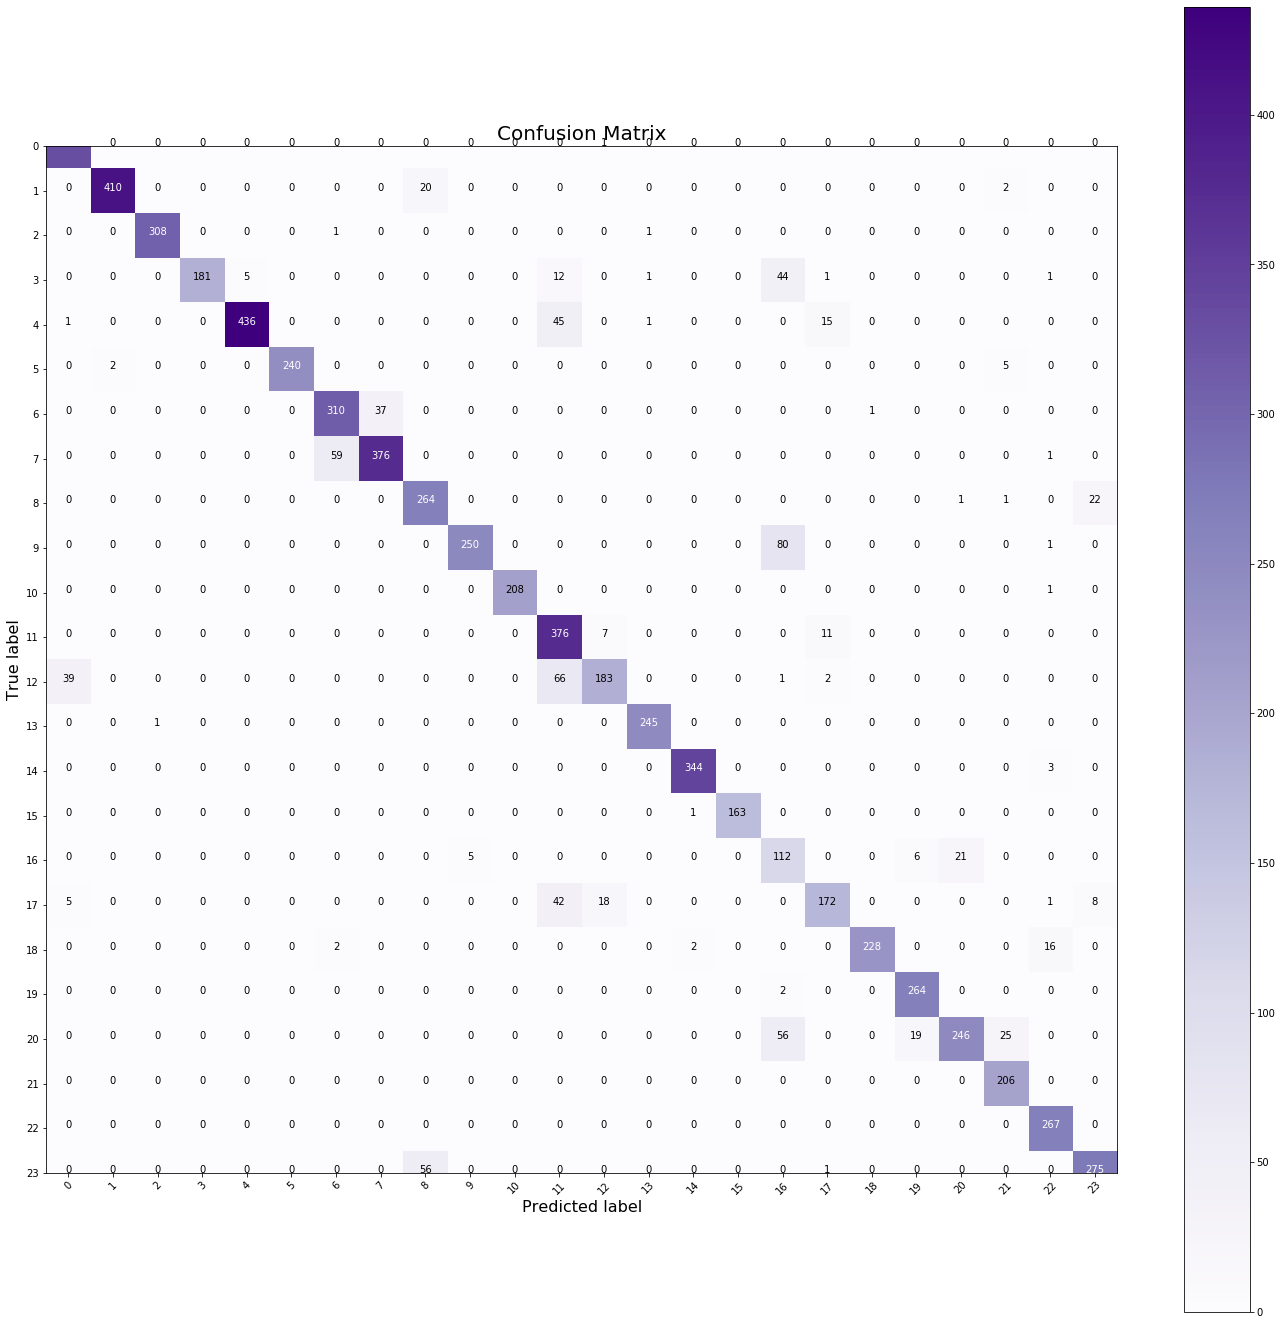

In [27]:
from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model.predict(x_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)

As we can see we got a really great accuracy 

We can increate the accuracy by tuning the hyper parameters of the model like playing with different activation functions and using different loss functions